In [32]:
library(rcompanion)
library(ggplot2)

library(dplyr) # for data cleaning
library(ISLR) # for college dataset
library(cluster) # for gower similarity and pam
library(Rtsne) # for t-SNE plot
library(ggplot2) # for visualization

In [33]:
data <- read.csv('Data/CarPrice_Assignment.csv')
drops <- c("car_ID","price","CarName")
data<-data[ , !(names(data) %in% drops)]
data$symboling<-as.factor(data$symboling)
data_cat<-data[ ,sapply(data, is.factor)]
data_cont<-data[ ,!sapply(data, is.factor)]


    lambda     W Shapiro.p.value
201     -5 0.965       5.679e-05

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



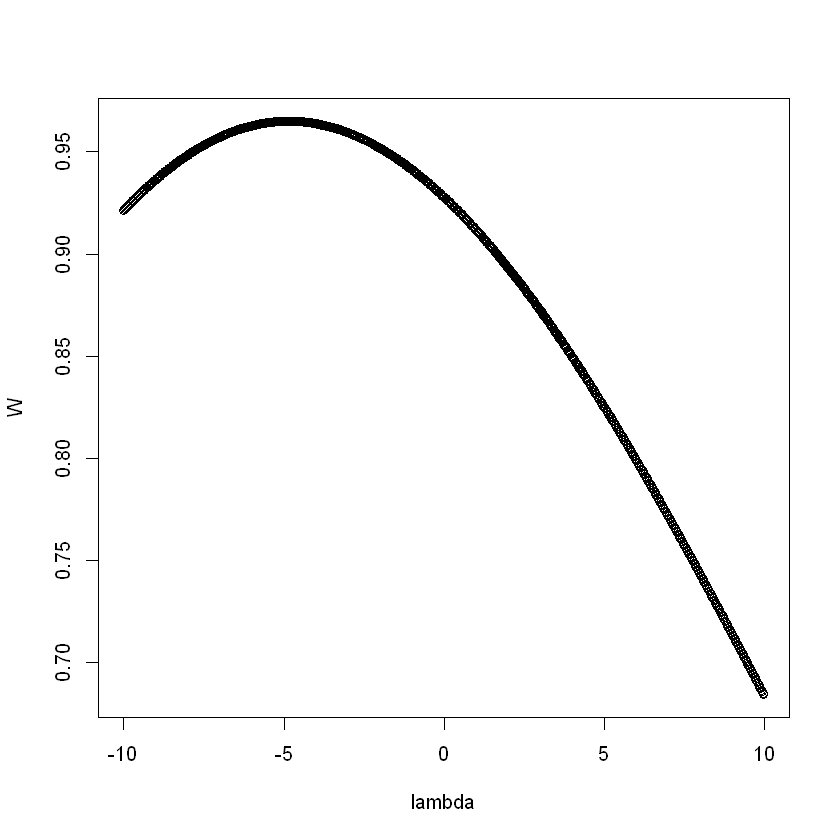

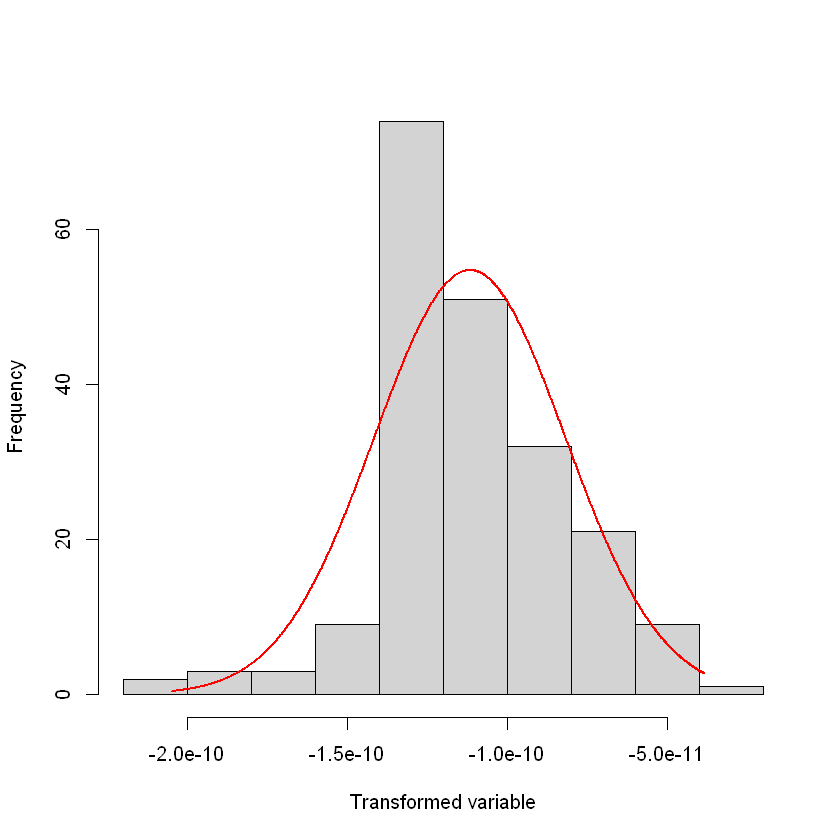

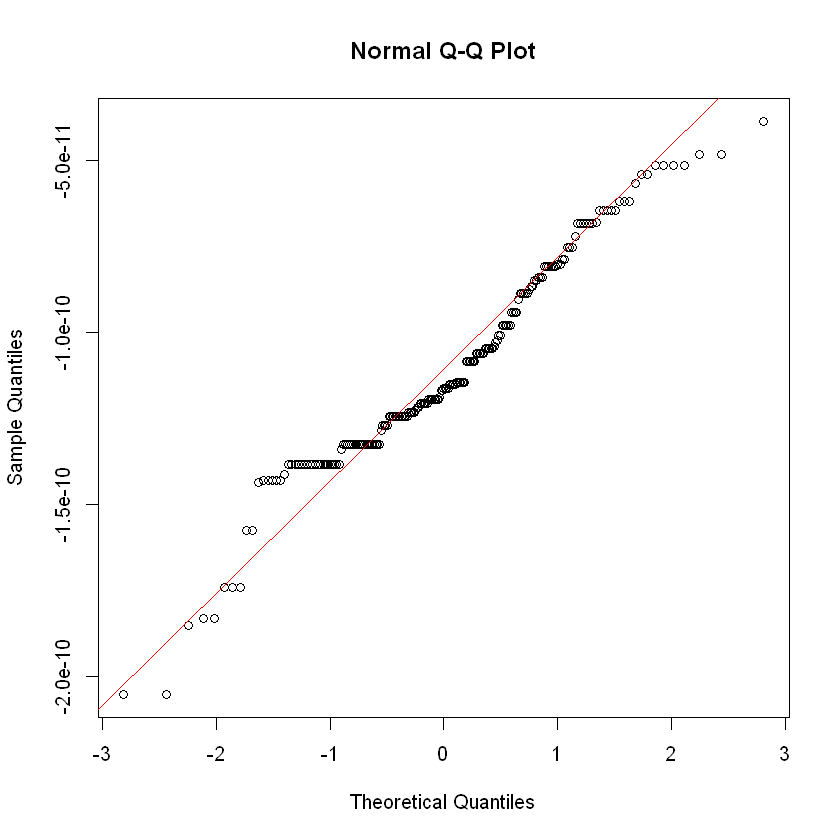


    lambda      W Shapiro.p.value
406  0.125 0.9834           0.016

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



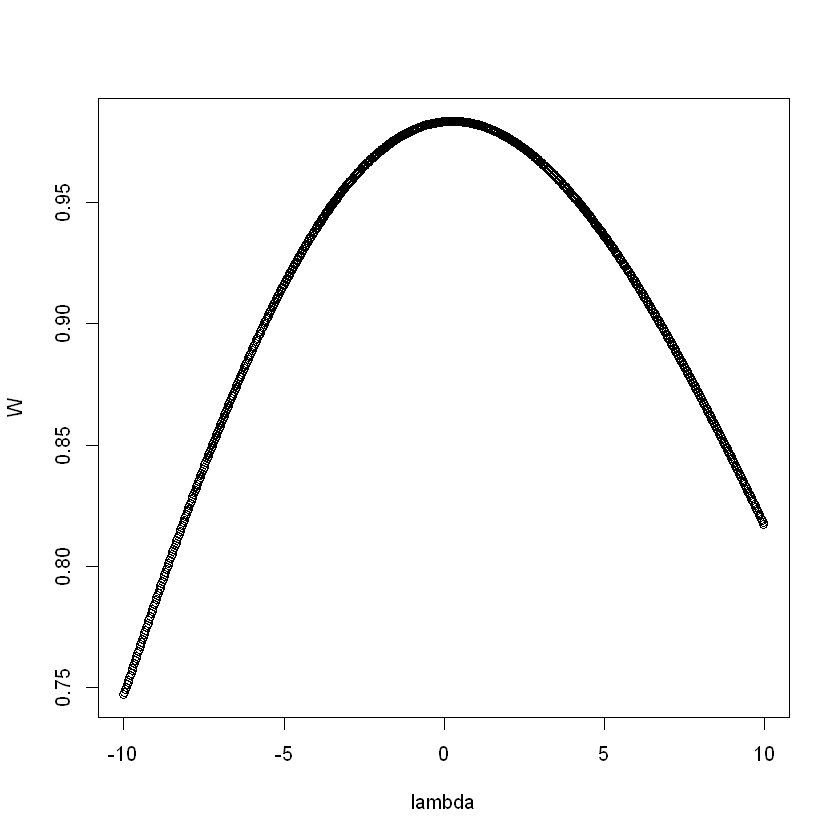

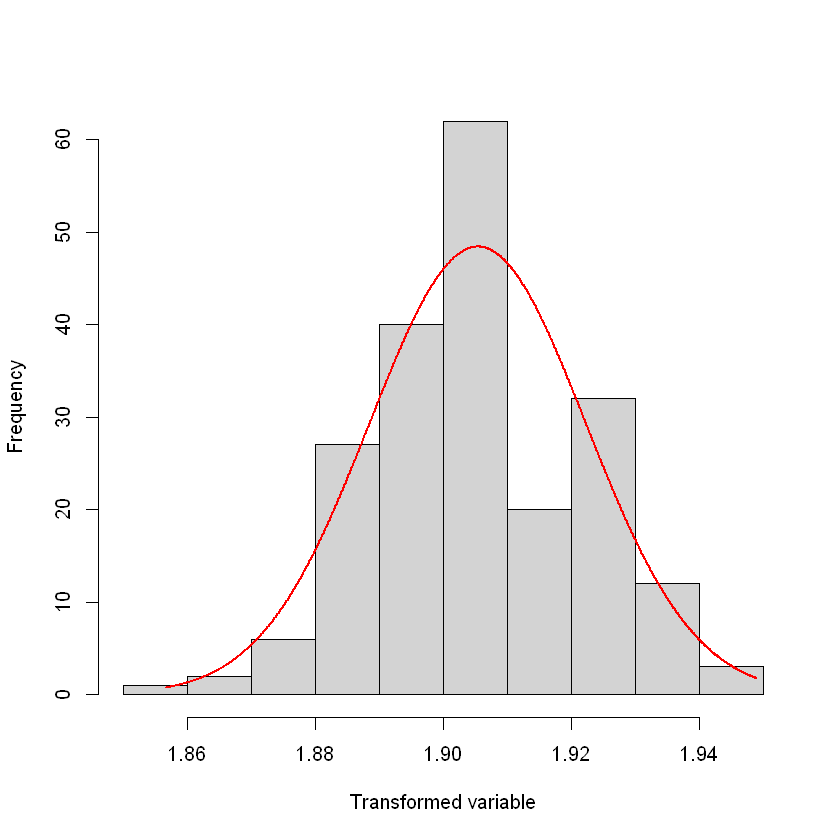

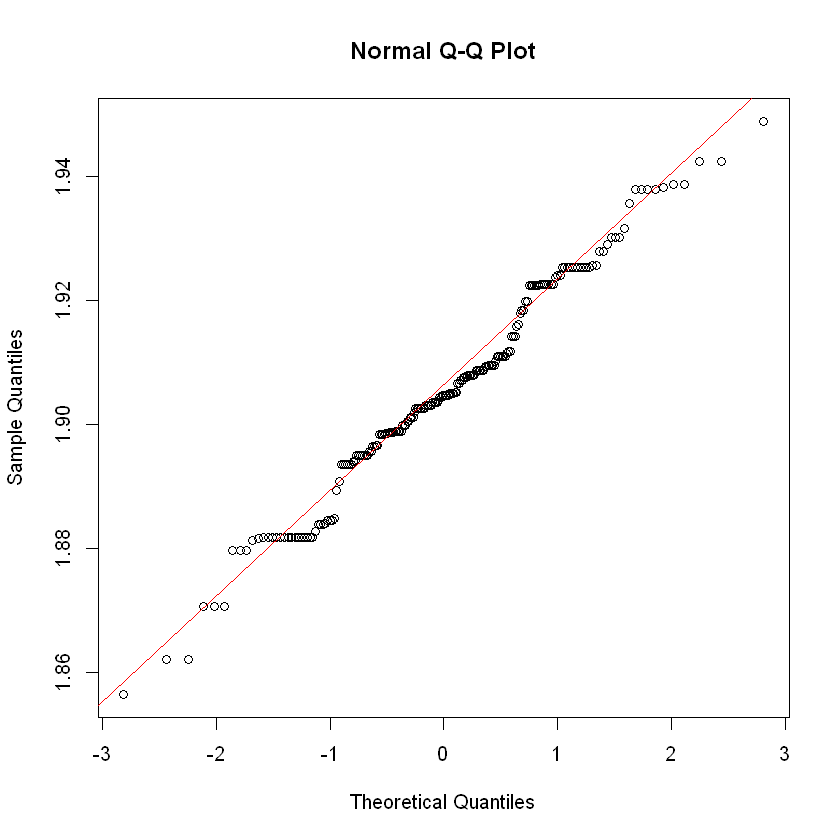


   lambda      W Shapiro.p.value
89   -7.8 0.9573       7.884e-06

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



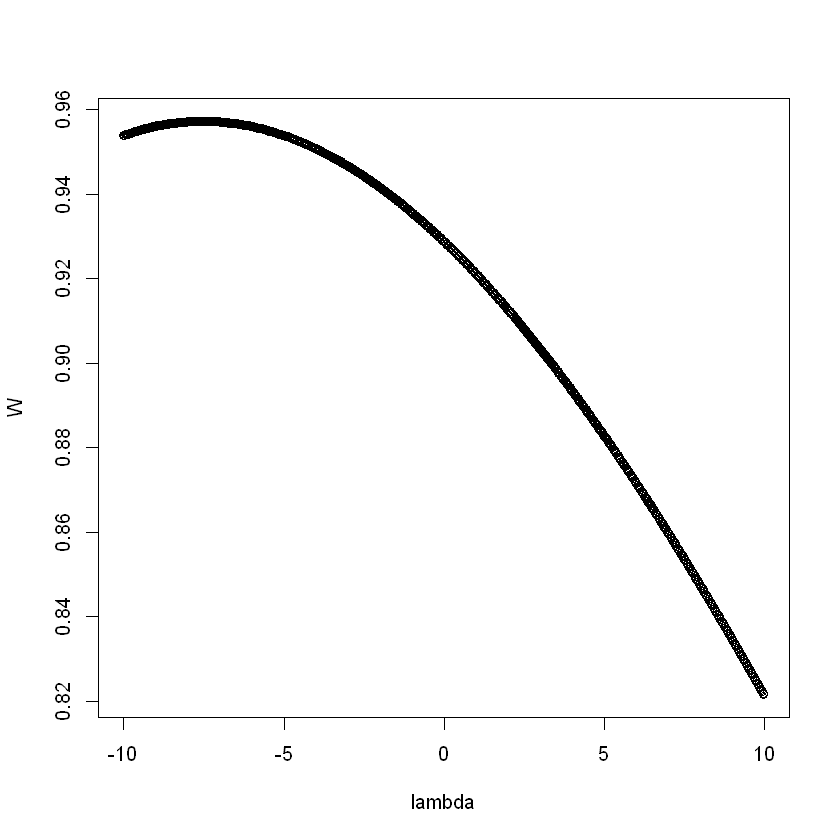

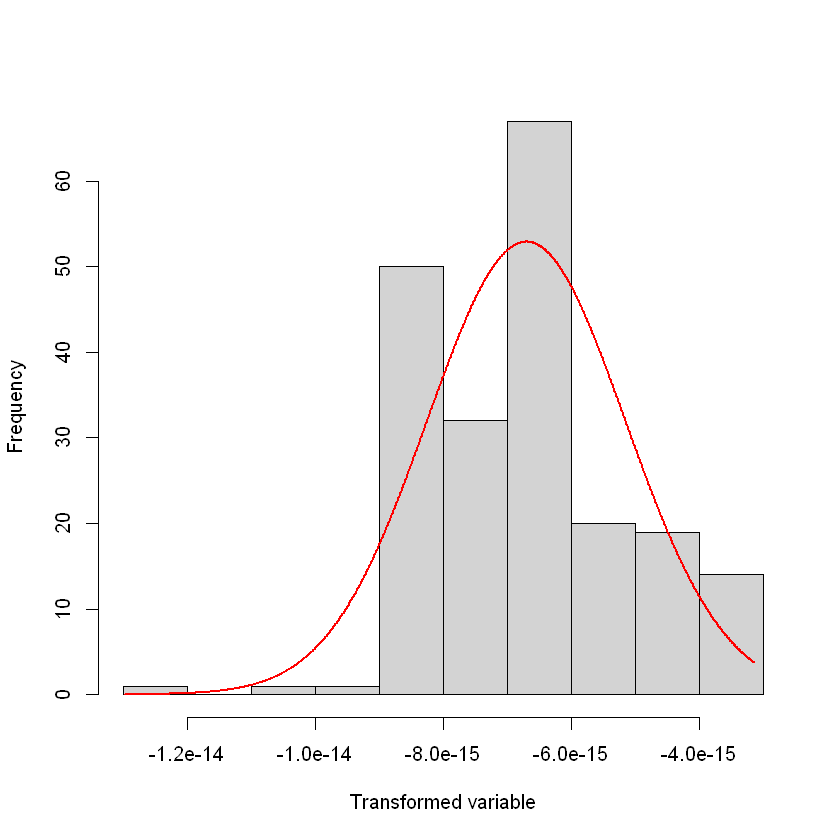

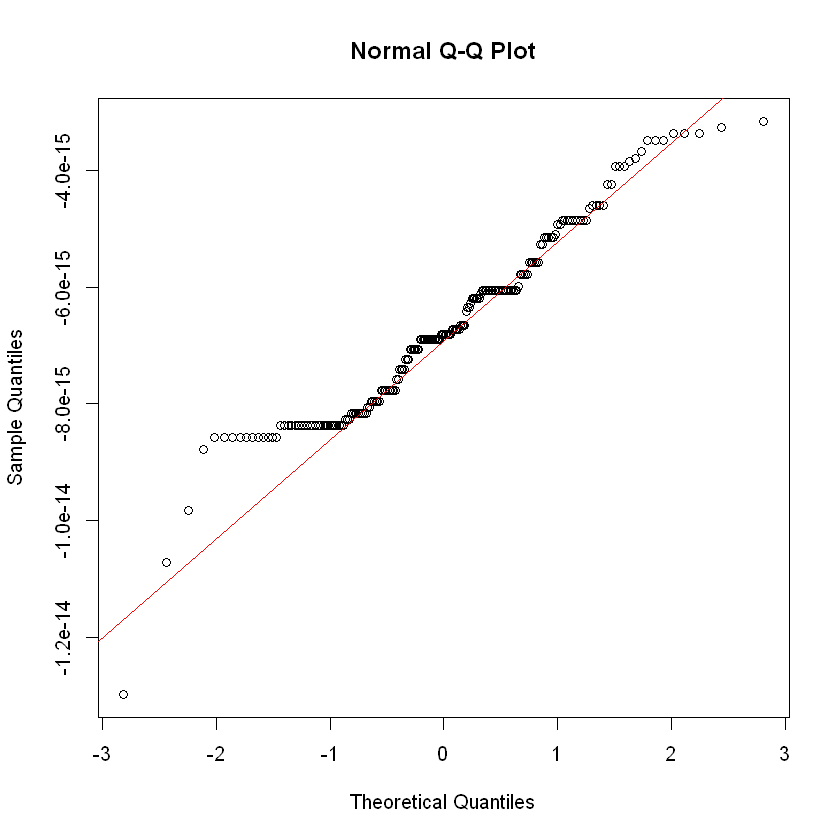


    lambda      W Shapiro.p.value
417    0.4 0.9845         0.02341

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



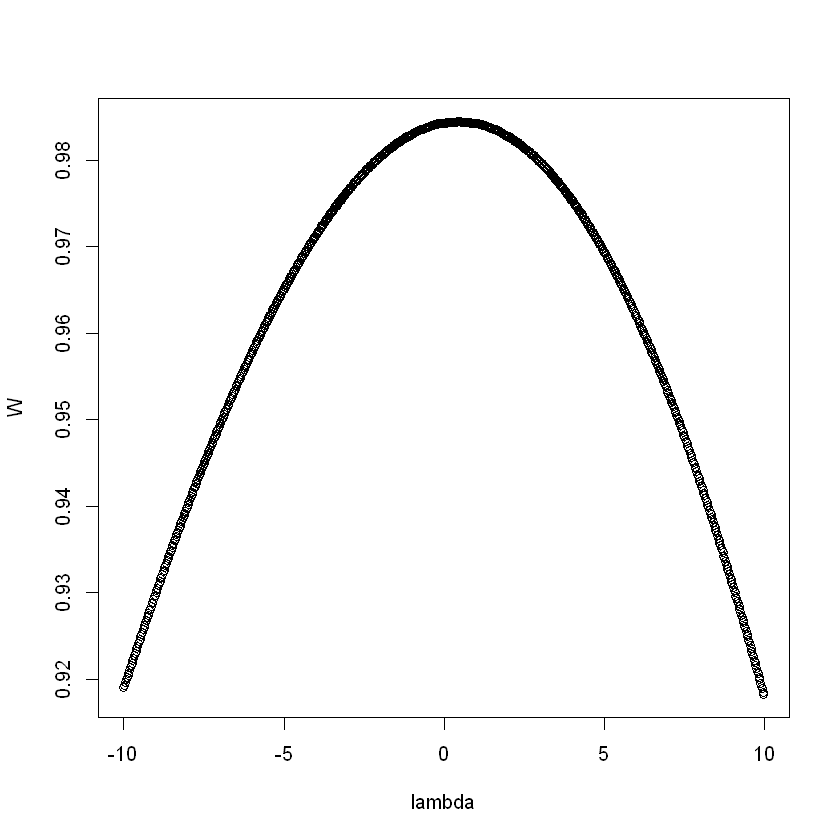

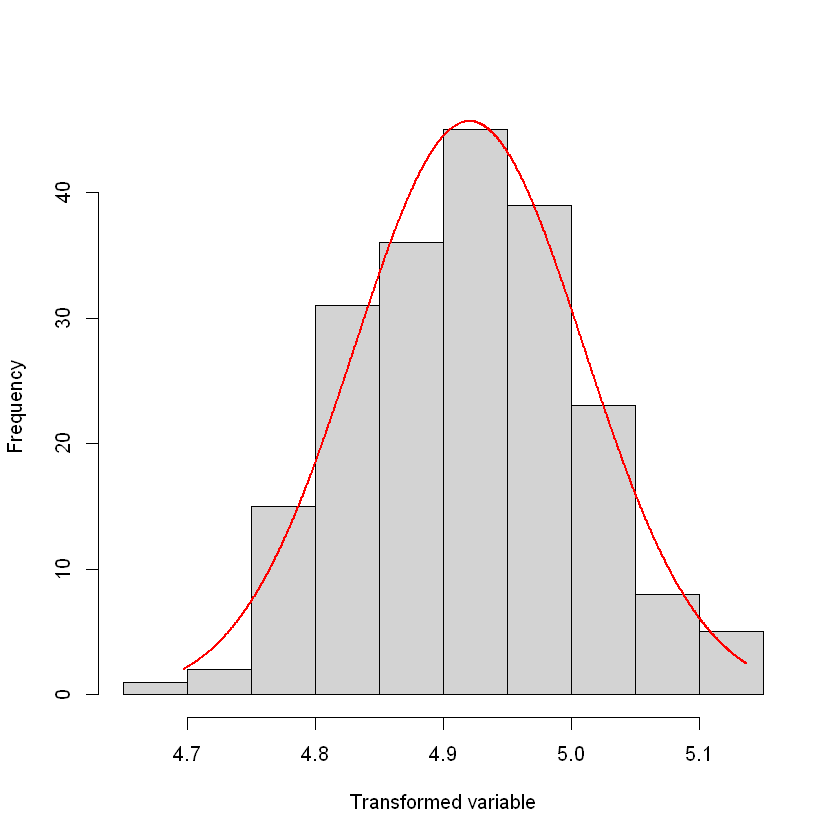

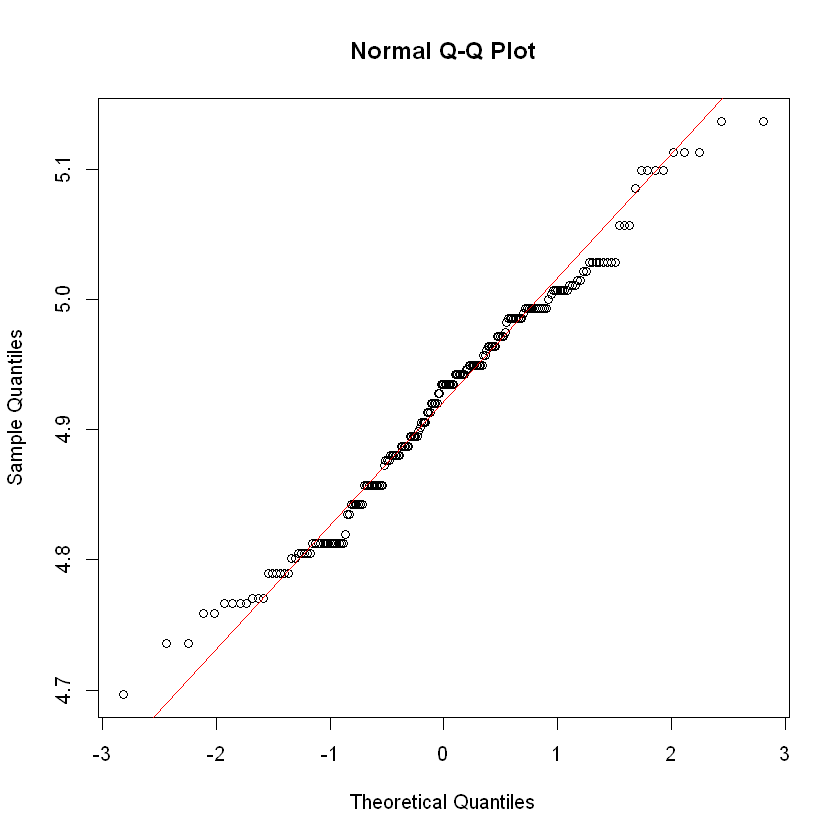


    lambda      W Shapiro.p.value
376 -0.625 0.9828         0.01301

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



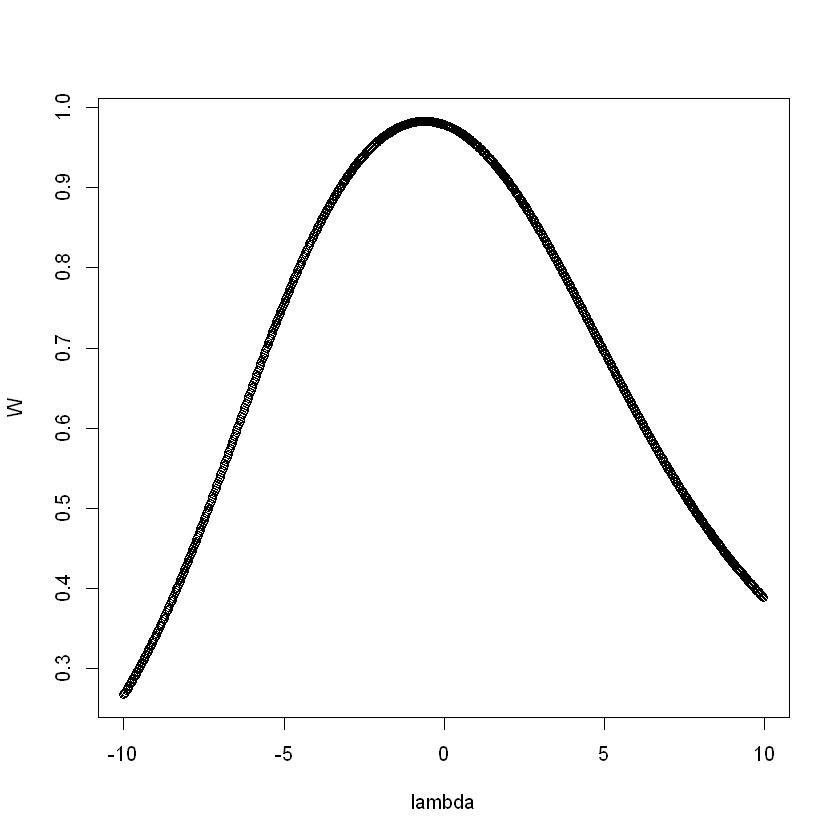

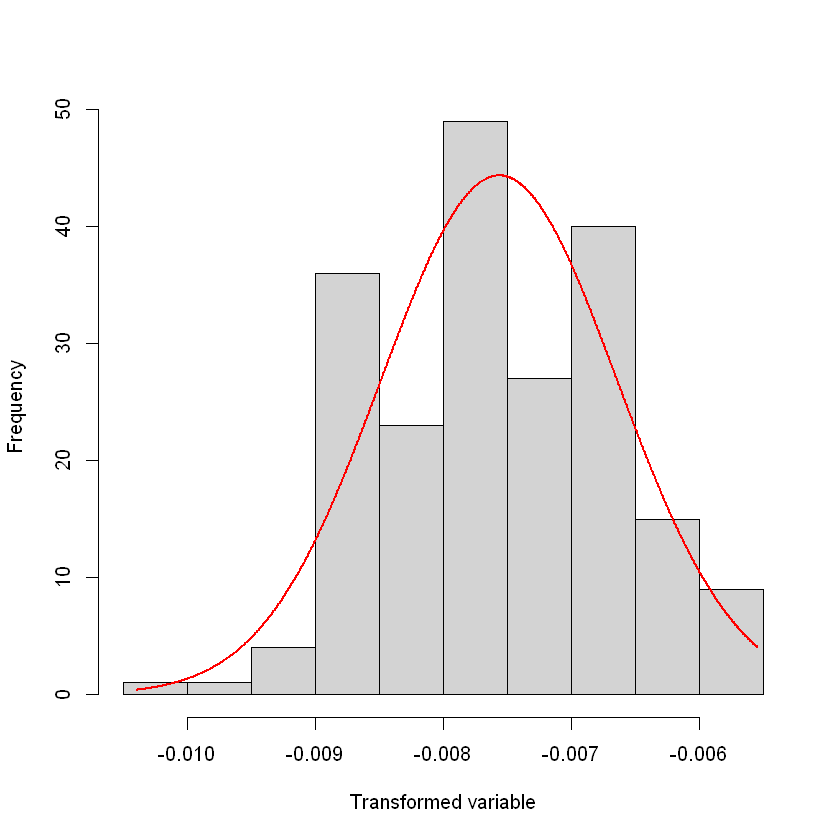

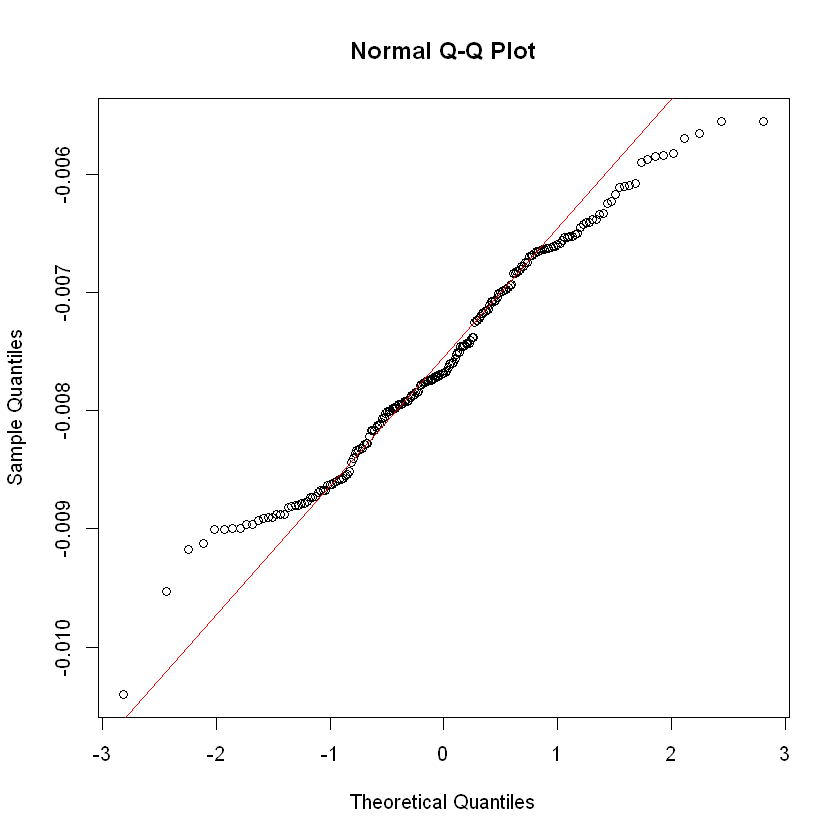


    lambda      W Shapiro.p.value
365   -0.9 0.9754         0.00115

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



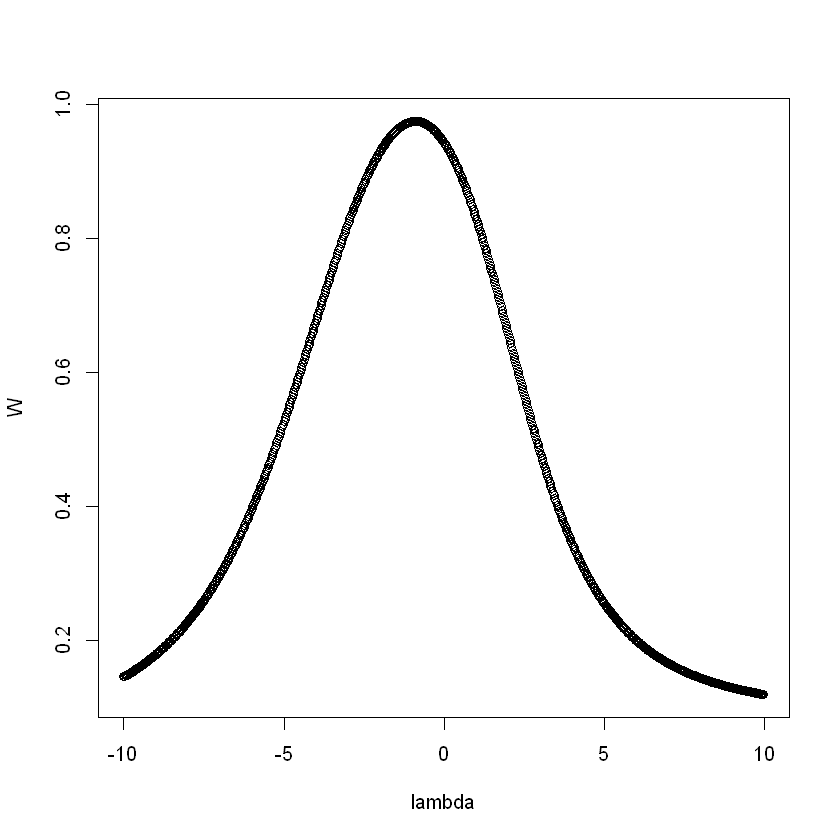

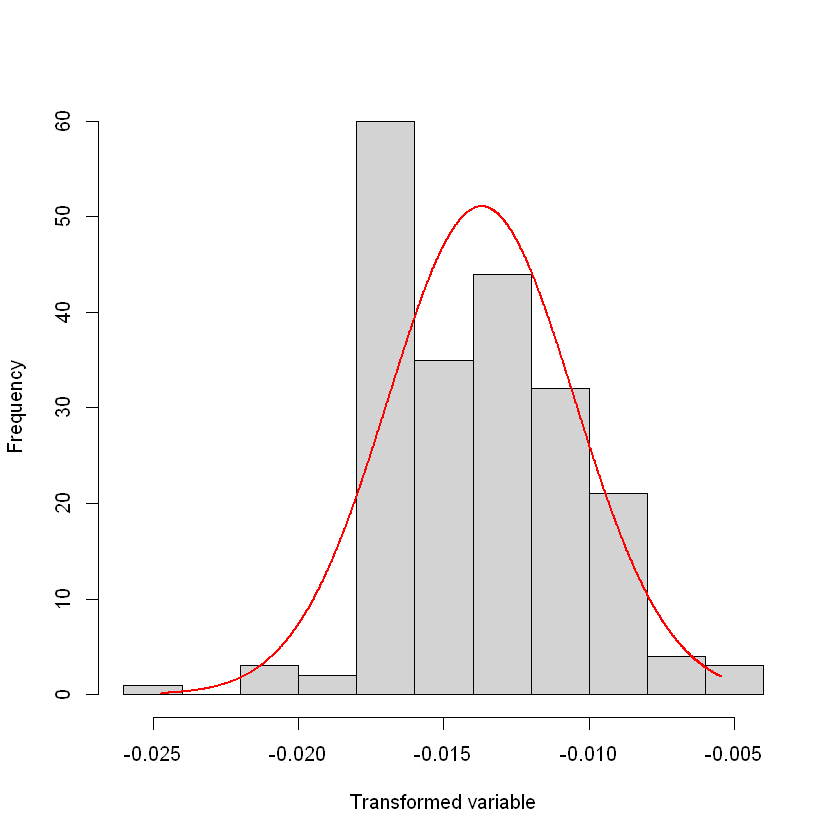

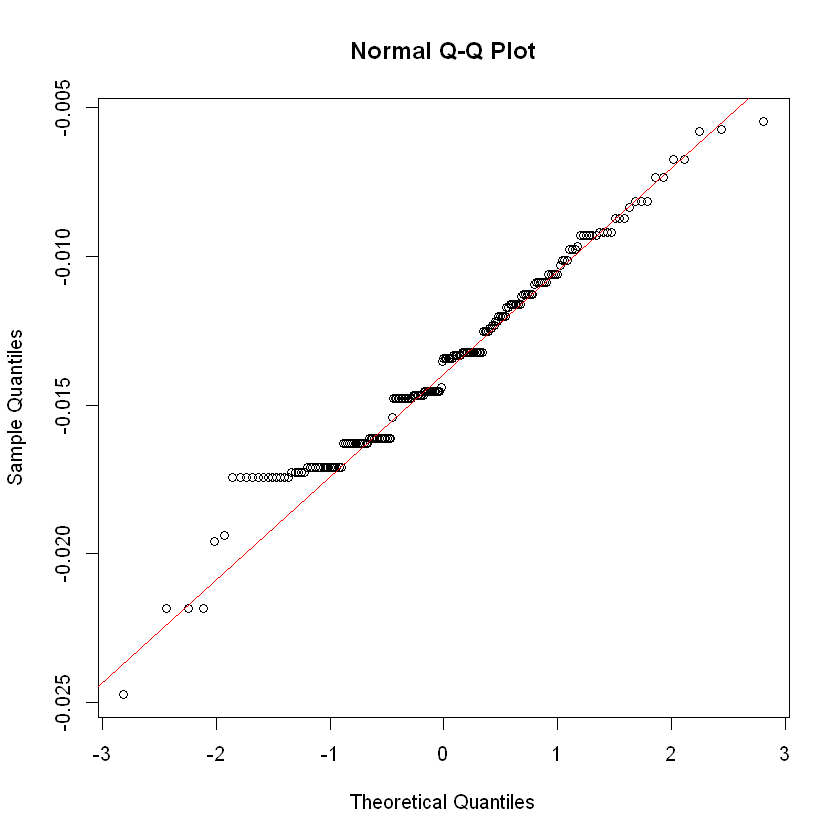


    lambda      W Shapiro.p.value
422  0.525 0.9673       0.0001066

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



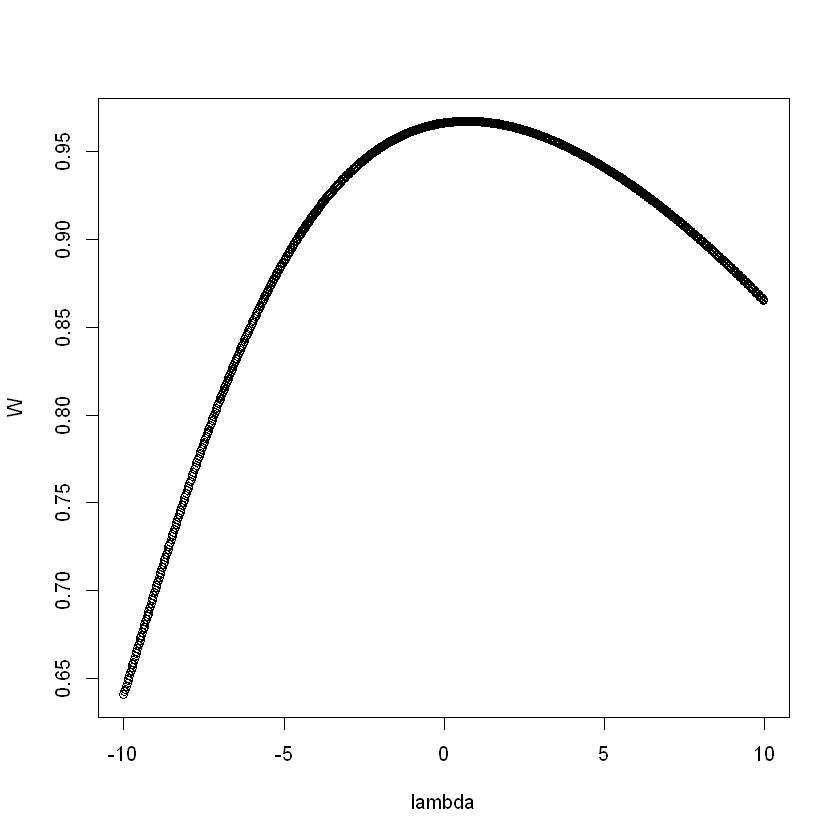

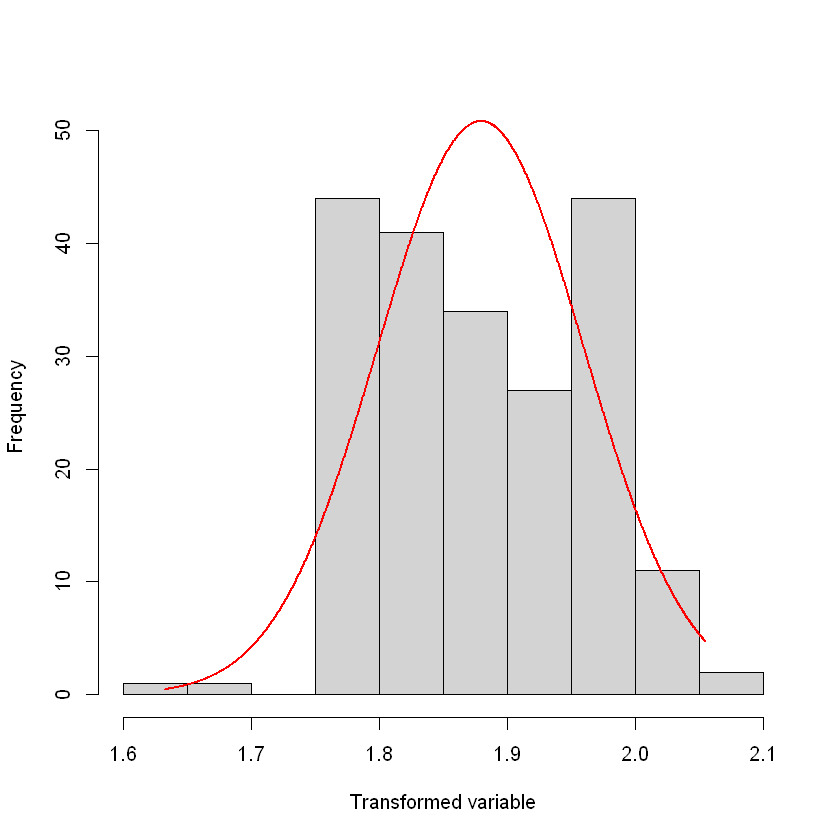

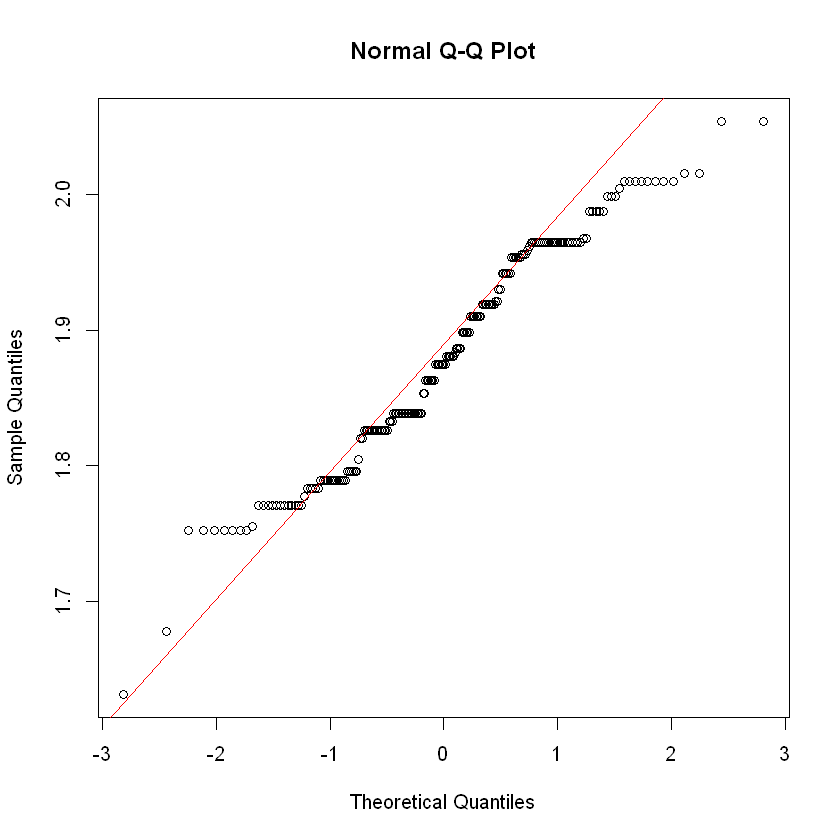


    lambda      W Shapiro.p.value
492  2.275 0.9558       5.483e-06

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



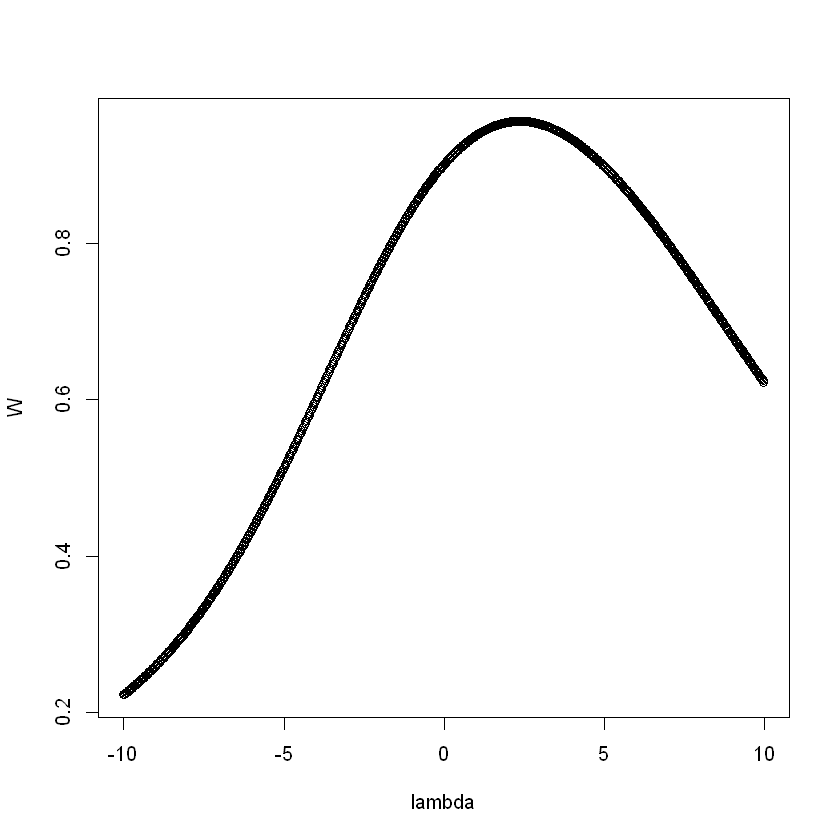

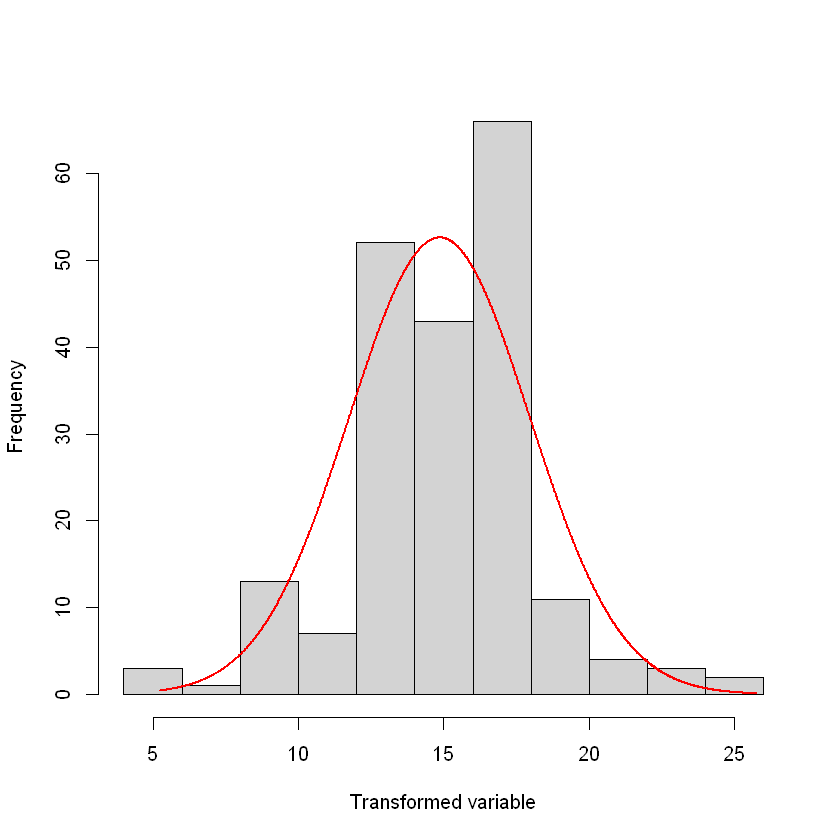

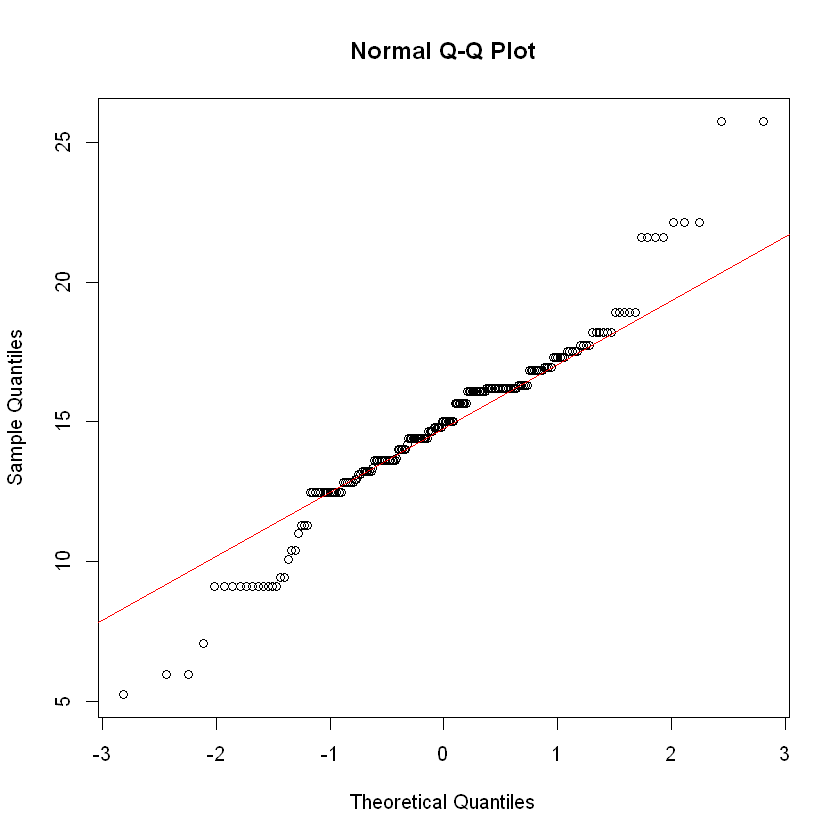


    lambda      W Shapiro.p.value
263  -3.45 0.8742       5.058e-12

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



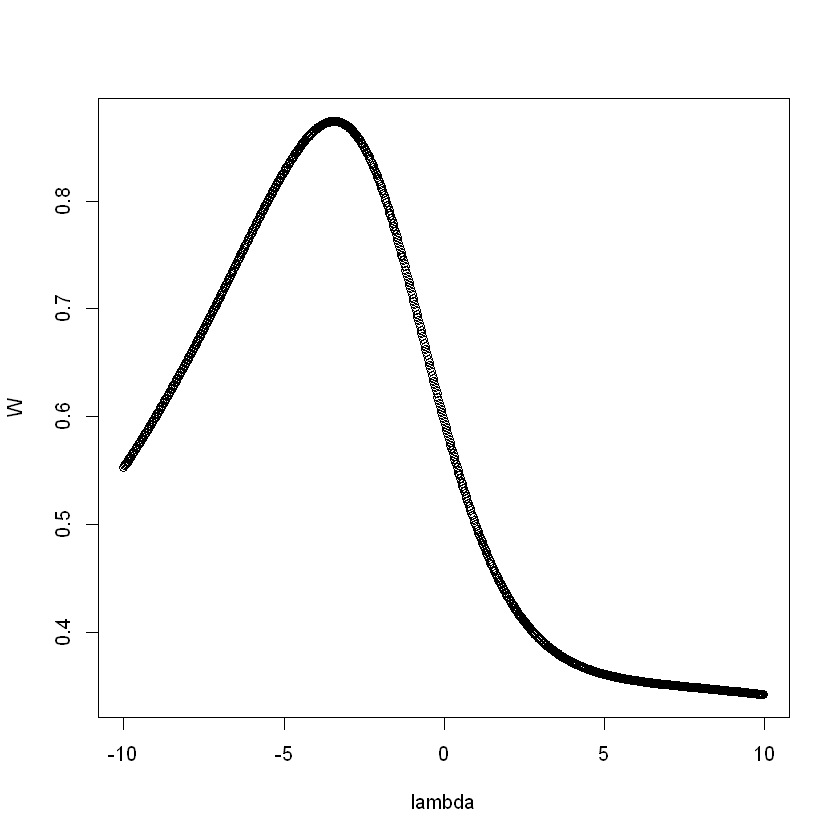

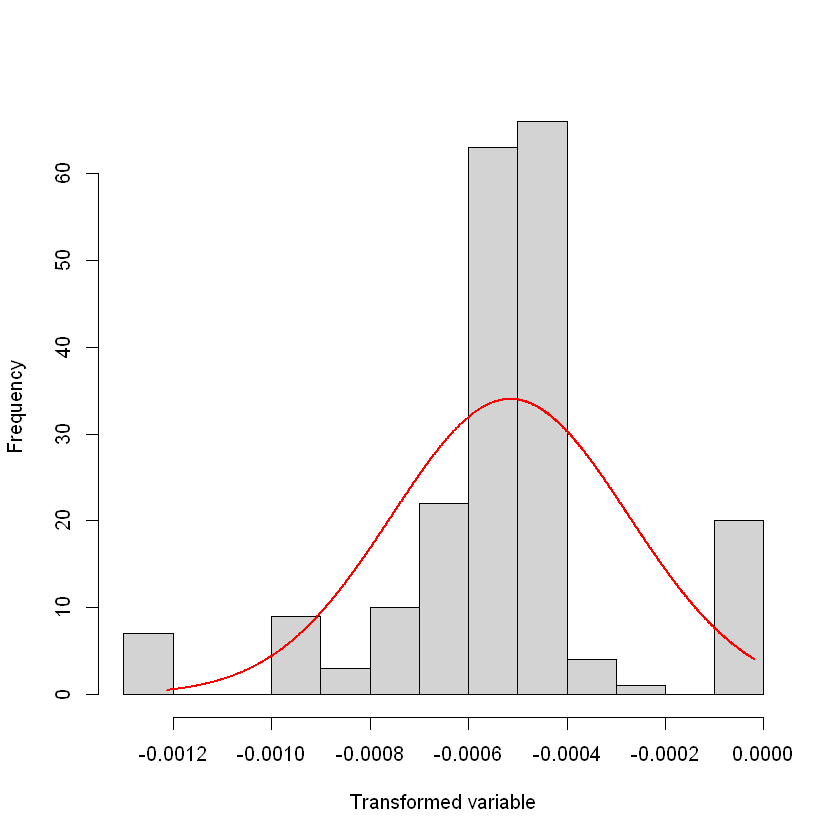

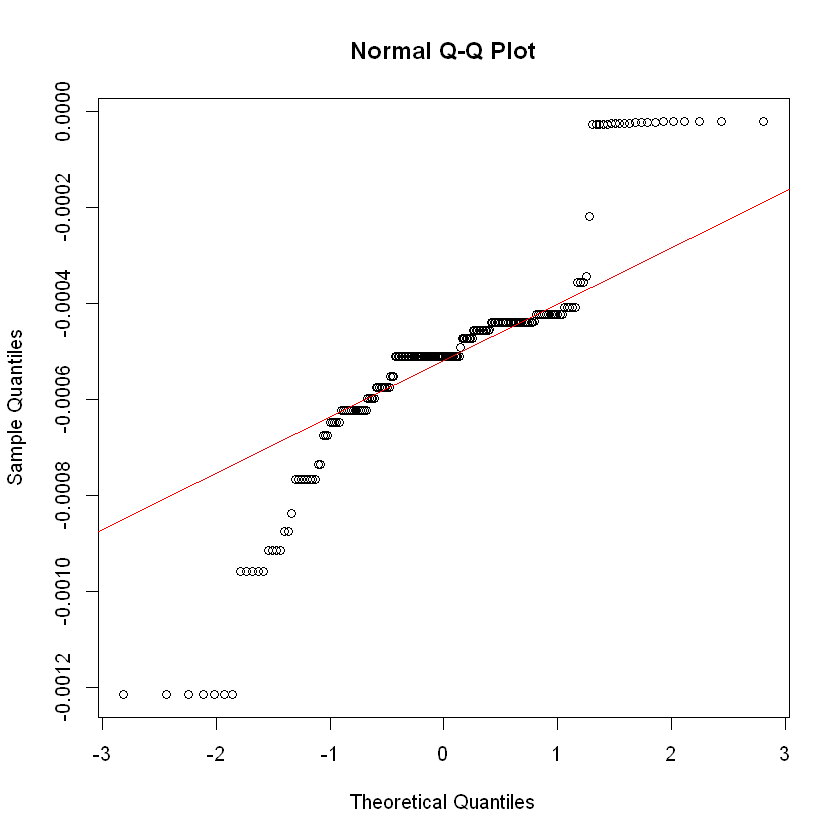


    lambda      W Shapiro.p.value
376 -0.625 0.9792        0.003886

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



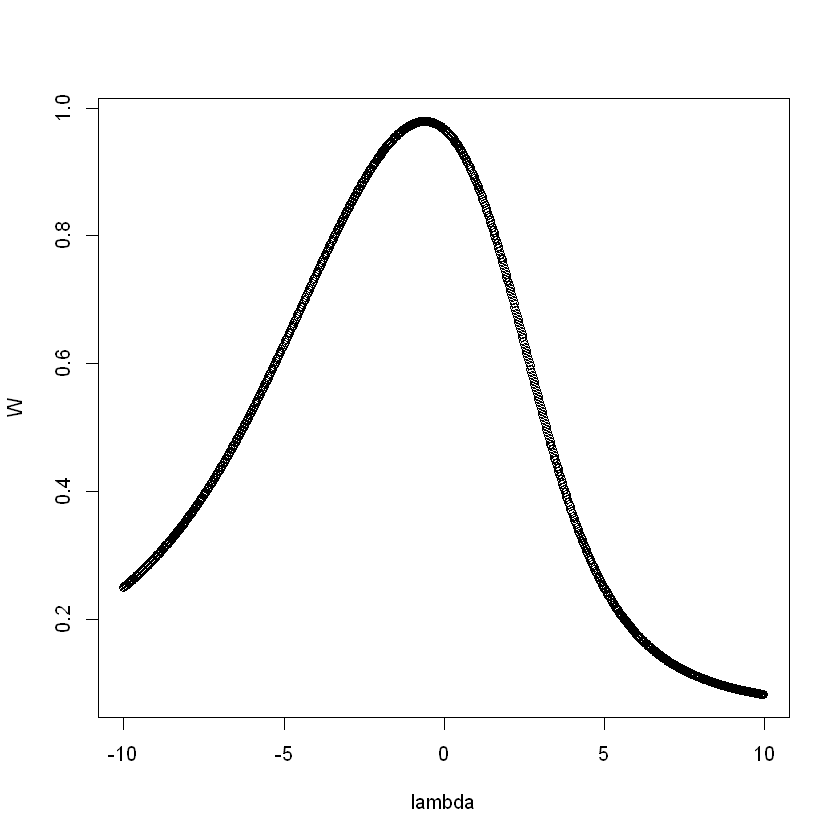

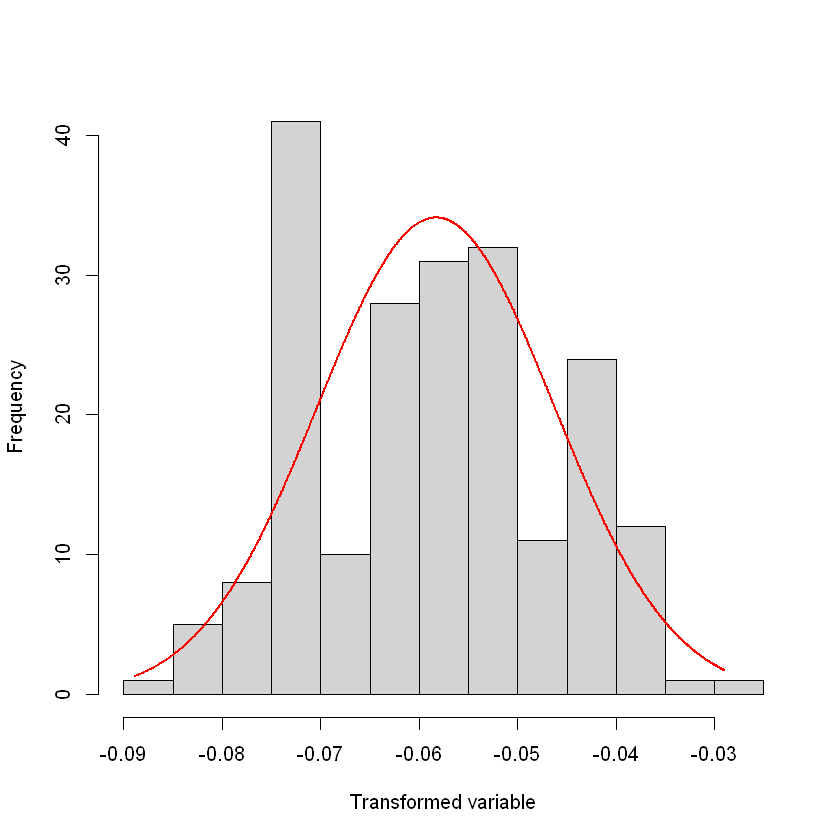

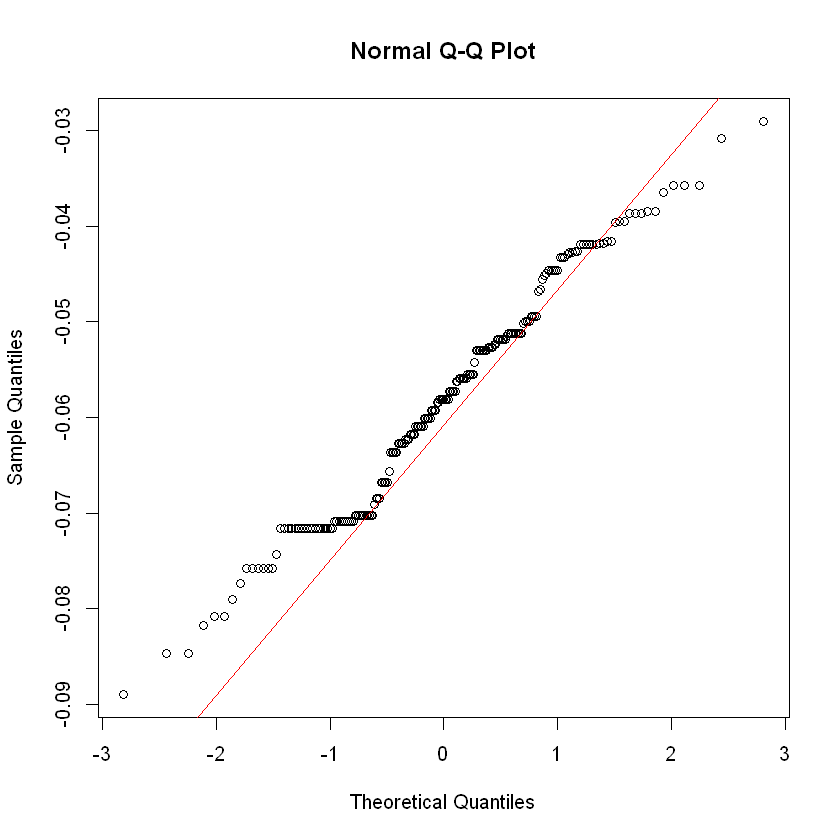


    lambda      W Shapiro.p.value
433    0.8 0.9707       0.0002788

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



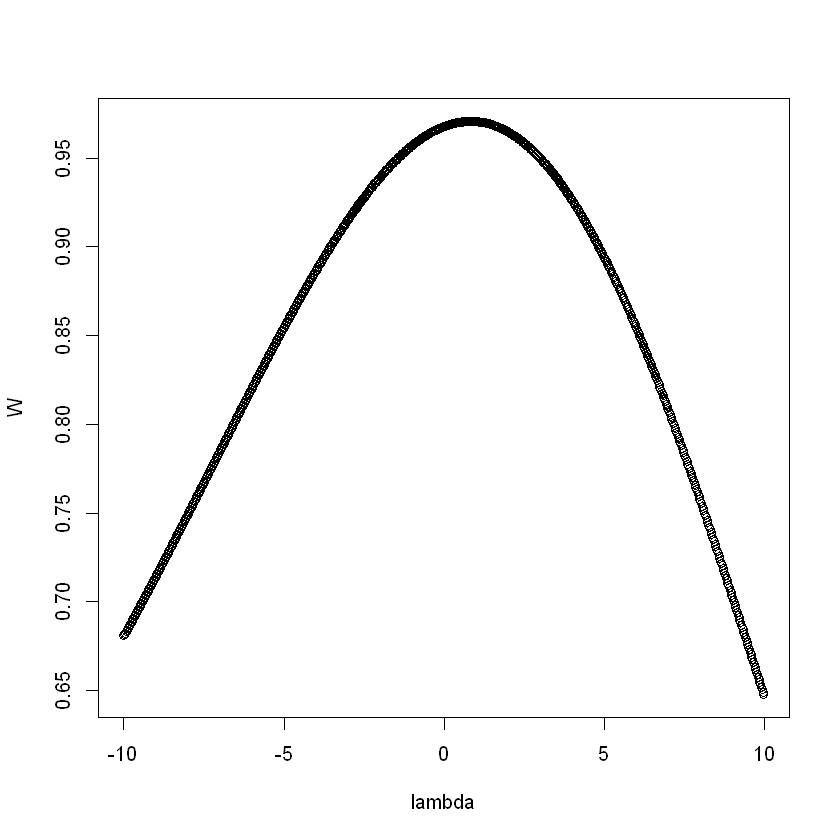

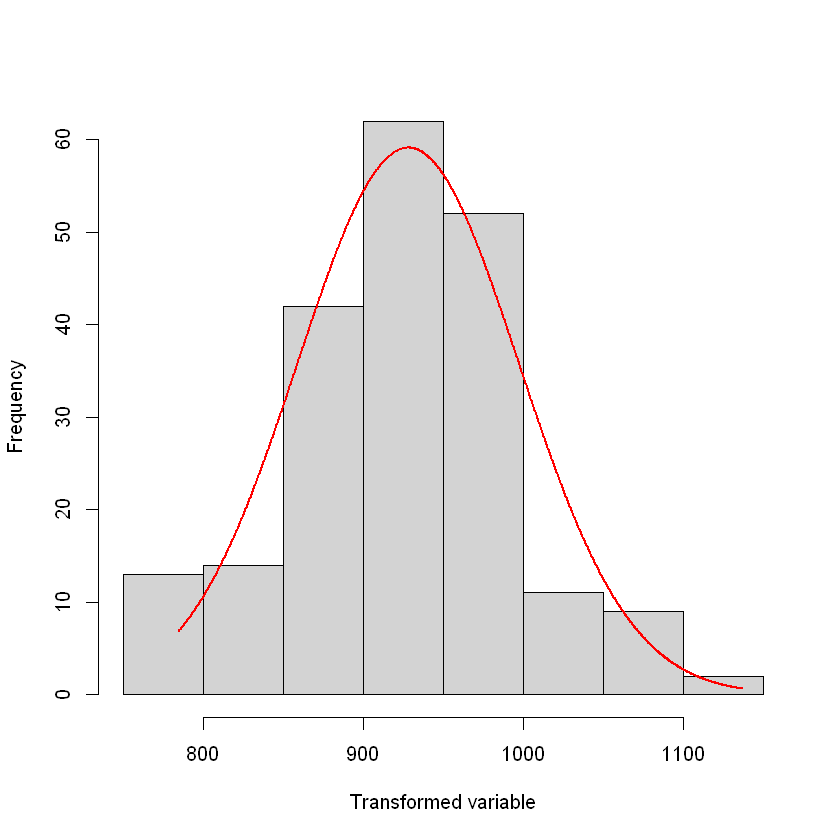

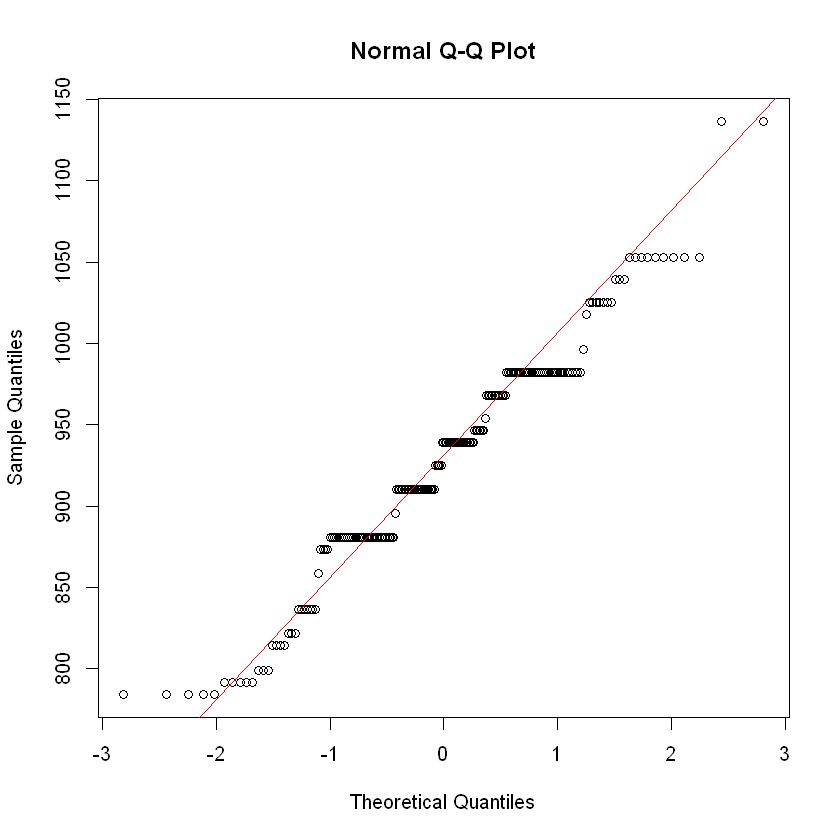


    lambda      W Shapiro.p.value
401      0 0.9813        0.007841

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



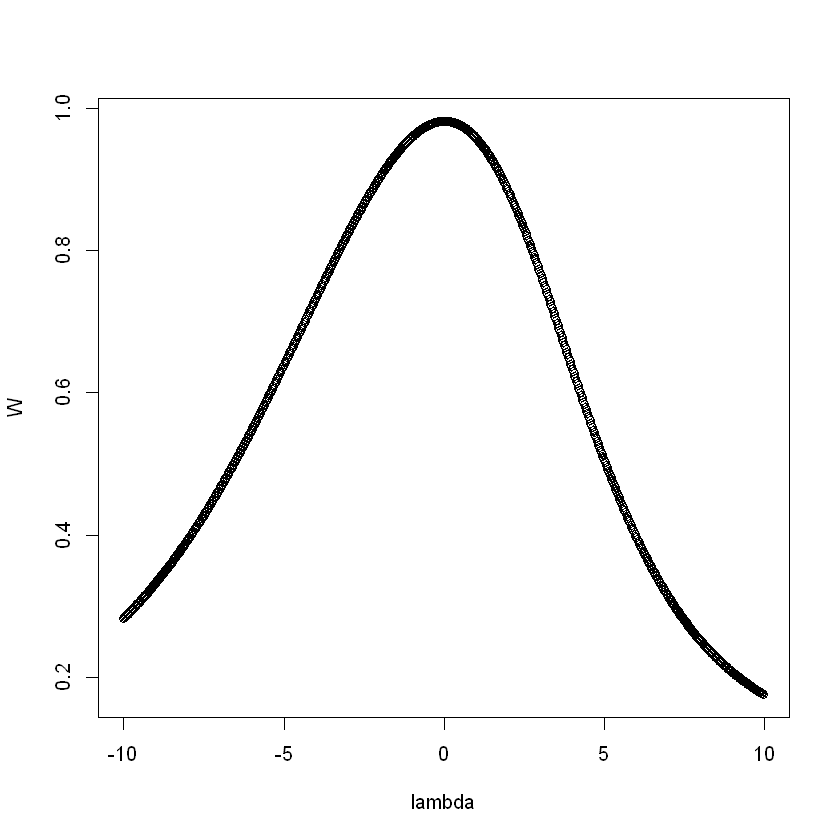

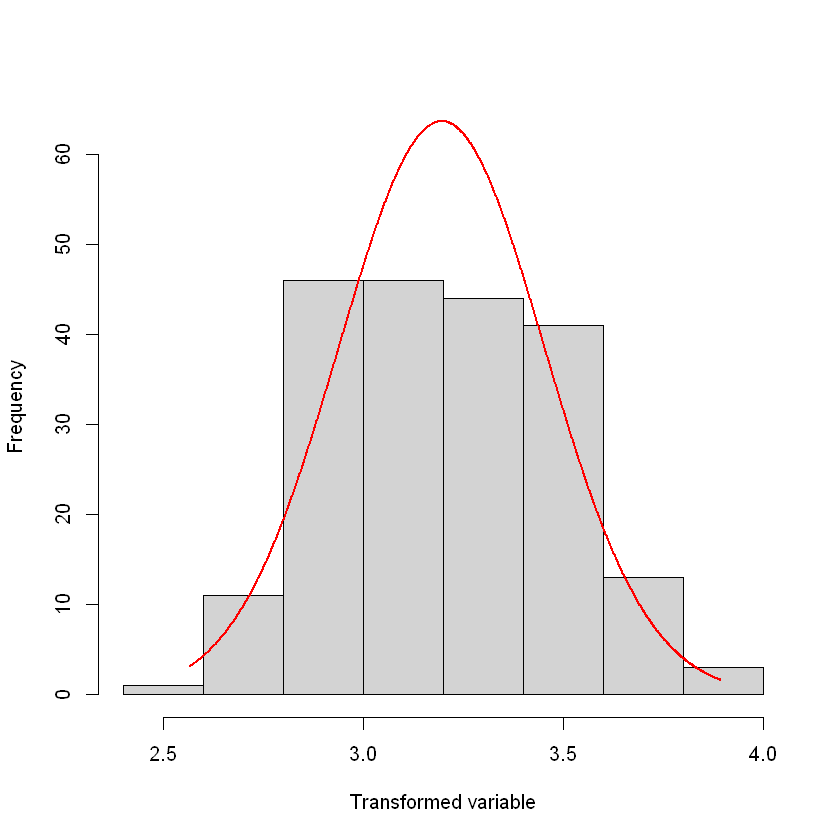

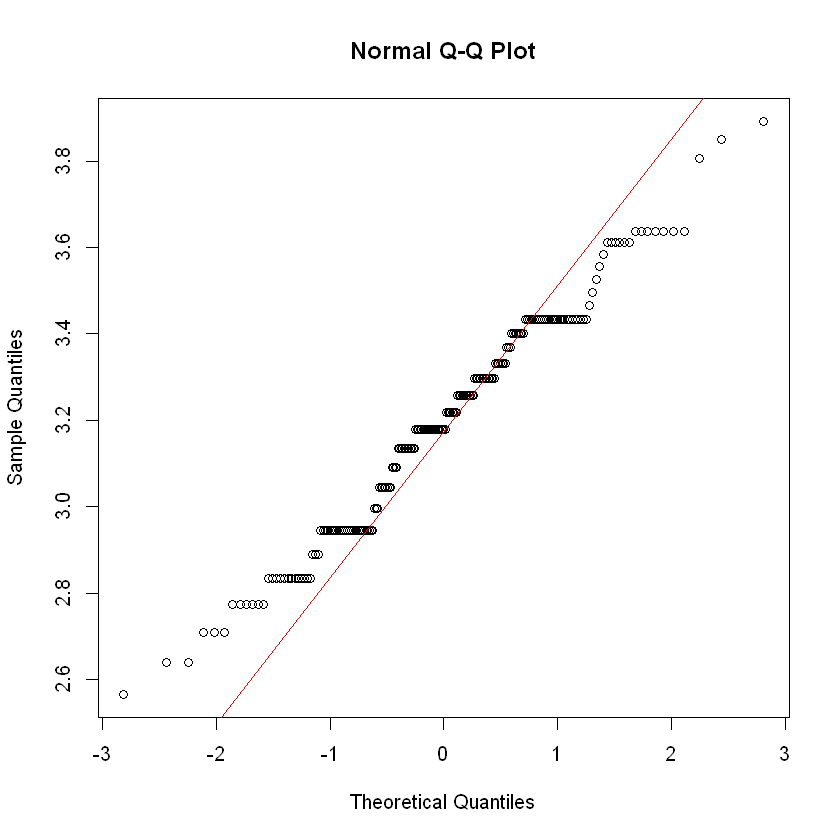


    lambda      W Shapiro.p.value
408  0.175 0.9887          0.1044

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



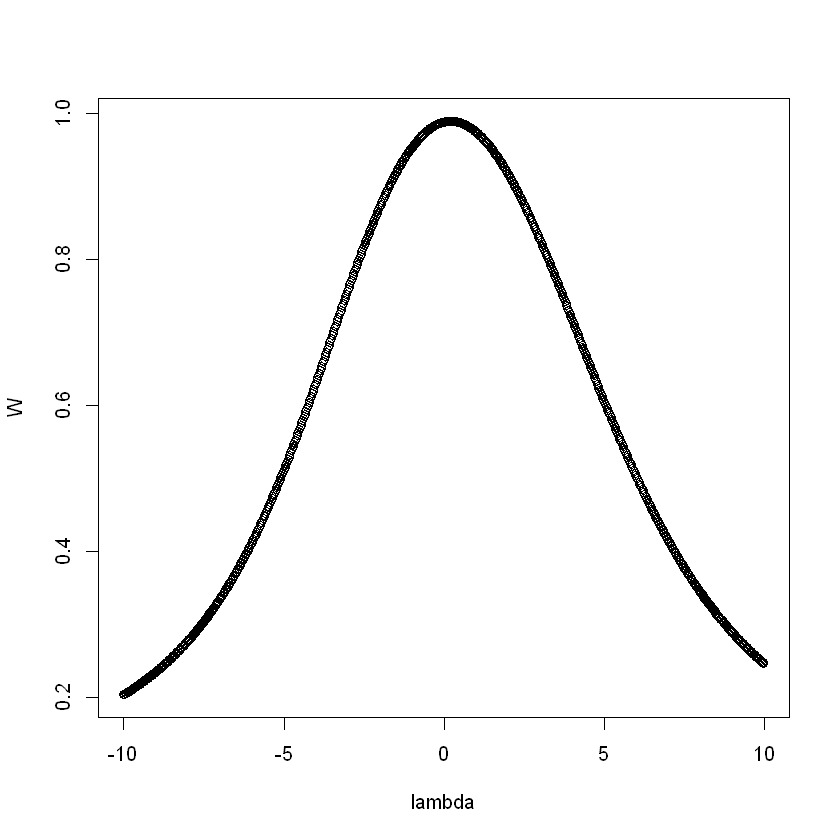

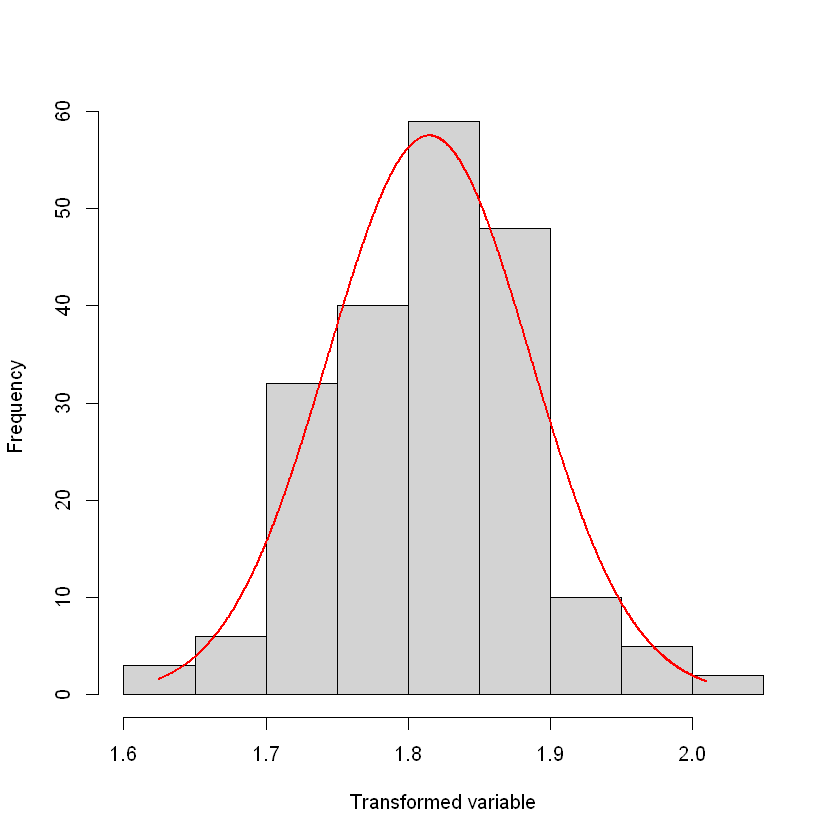

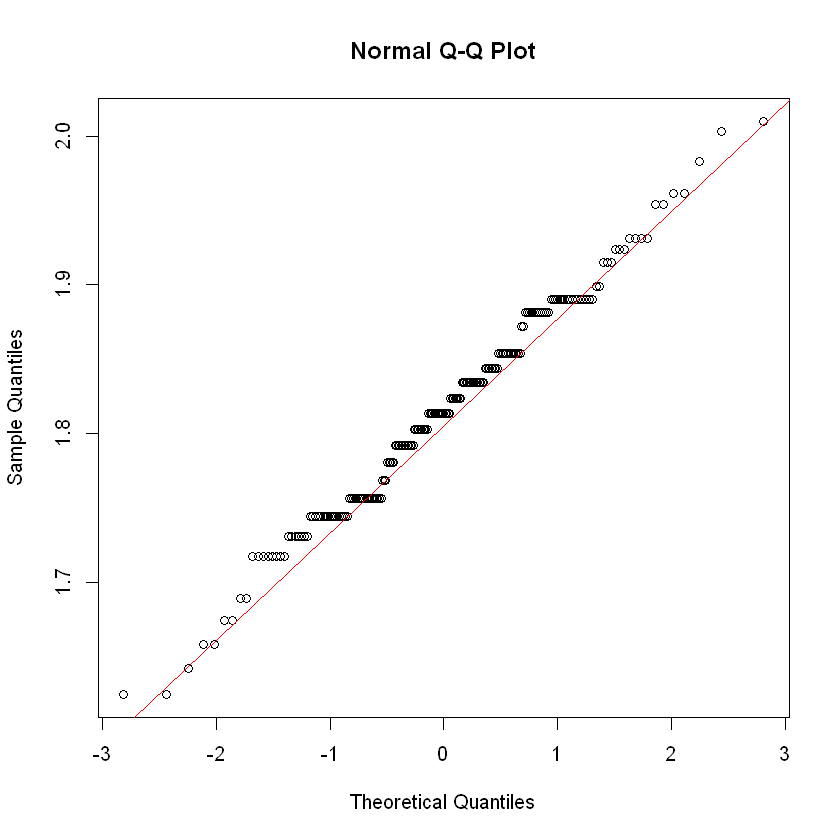

In [34]:
data_1<-sapply(data_cont,transformTukey)

In [60]:
transformed_data <- data_1

In [61]:
gower_dist <- daisy(transformed_data,
                    metric = "gower")
                    

In [62]:
gower_mat <- as.matrix(gower_dist)

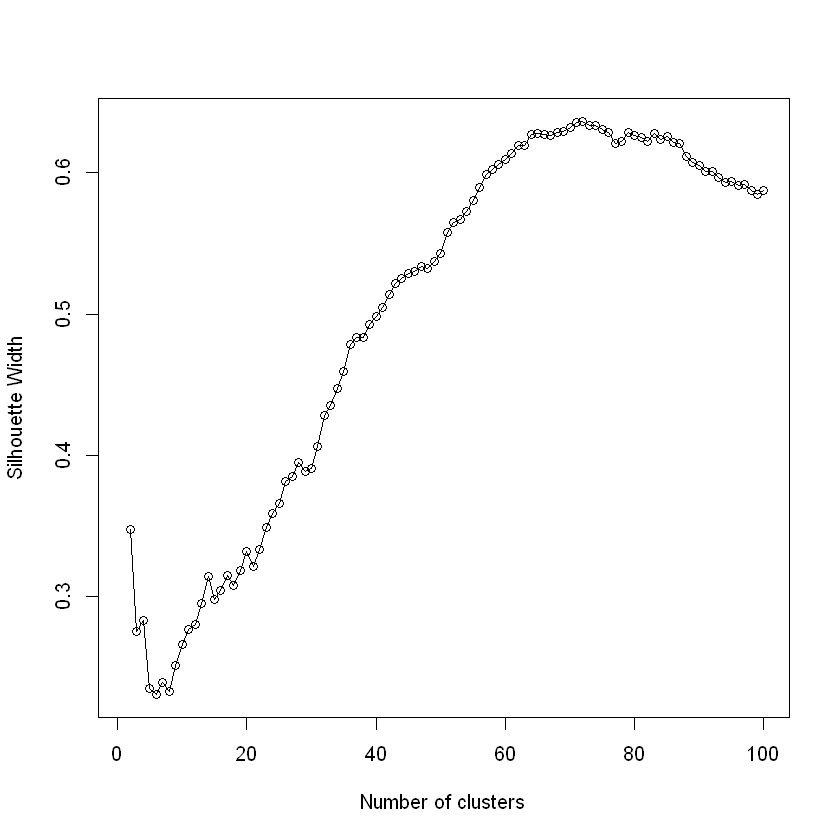

In [63]:
# Calculate silhouette width for many k using PAM

sil_width <- c(NA)

for(i in 2:100){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}

# Plot sihouette width (higher is better)

plot(1:100, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:100, sil_width)

In [66]:
pam_fit <- pam(gower_dist, diss = TRUE, k = 2)

pam_results <- transformed_data 

pam_results$cluster <- pam_fit$clustering




Warning message in pam_results$cluster <- pam_fit$clustering:
"Coercing LHS to a list"


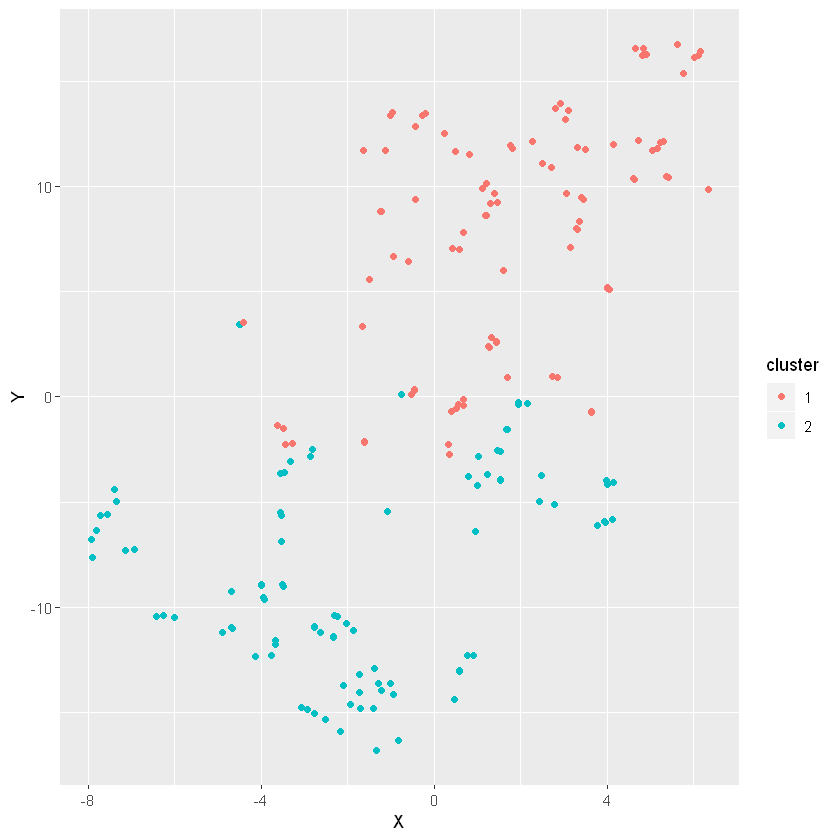

In [68]:
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)

tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))

ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

In [69]:
data <- read.csv('Data/CarPrice_Assignment.csv')
drops <- c("car_ID","CarName")
data<-data[ , !(names(data) %in% drops)]
data$symboling<-as.factor(data$symboling)

In [72]:
data_cat<-data[ ,sapply(data, is.factor)]
data_cont<-data[ ,!sapply(data, is.factor)]

In [77]:
summary(lm(price ~ .-highwaympg-citympg        ,data=data_cont))


Call:
lm(formula = price ~ . - highwaympg - citympg, data = data_cont)

Residuals:
     Min       1Q   Median       3Q      Max 
-11028.7  -1543.3   -274.1   1433.8  14088.3 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -5.275e+04  1.457e+04  -3.619 0.000377 ***
wheelbase         7.810e+01  9.798e+01   0.797 0.426412    
carlength        -5.984e+01  5.269e+01  -1.136 0.257550    
carwidth          5.127e+02  2.469e+02   2.077 0.039160 *  
carheight         1.417e+02  1.354e+02   1.047 0.296443    
curbweight        2.375e+00  1.531e+00   1.552 0.122400    
enginesize        1.101e+02  1.327e+01   8.298  1.8e-14 ***
boreratio        -7.503e+02  1.192e+03  -0.630 0.529691    
stroke           -2.889e+03  7.767e+02  -3.720 0.000261 ***
compressionratio  2.369e+02  6.962e+01   3.402 0.000813 ***
horsepower        4.092e+01  1.540e+01   2.658 0.008527 ** 
peakrpm           2.442e+00  6.661e-01   3.667 0.000317 ***
---
Signif. codes:  0 '***' 0